## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
from keras.layers import Dropout
# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [7]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

# 5層隱藏層 Dropout = 0.25 或 0.75

In [8]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128,64,32], drp_ratio=0.2):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
## 超參數設定
"""
Set Hyper-parameters here
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.25,0.75]

In [17]:
results = {}
"""
Write your training loop and record results
"""
for drp in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp)
    model.summary()
    optimizer = keras.optimizers.adam(lr=LEARNING_RATE,  beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0,amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(drp)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
__________

50000/50000 [==============================] - 18s 352us/step - loss: 1.6590 - acc: 0.4068 - val_loss: 1.5889 - val_acc: 0.4426
Epoch 46/50
50000/50000 [==============================] - 18s 352us/step - loss: 1.6552 - acc: 0.4076 - val_loss: 1.5703 - val_acc: 0.4460
Epoch 47/50
50000/50000 [==============================] - 18s 353us/step - loss: 1.6560 - acc: 0.4075 - val_loss: 1.5806 - val_acc: 0.4467
Epoch 48/50
50000/50000 [==============================] - 18s 352us/step - loss: 1.6493 - acc: 0.4102 - val_loss: 1.5753 - val_acc: 0.4442
Epoch 49/50
50000/50000 [==============================] - 18s 356us/step - loss: 1.6457 - acc: 0.4130 - val_loss: 1.5610 - val_acc: 0.4456
Epoch 50/50
50000/50000 [==============================] - 18s 353us/step - loss: 1.6473 - acc: 0.4130 - val_loss: 1.5550 - val_acc: 0.4476
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072

50000/50000 [==============================] - 18s 352us/step - loss: 2.3027 - acc: 0.0958 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 18s 351us/step - loss: 2.3027 - acc: 0.0970 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 18s 351us/step - loss: 2.3027 - acc: 0.0968 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 18s 351us/step - loss: 2.3027 - acc: 0.0989 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 18s 351us/step - loss: 2.3027 - acc: 0.0966 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 18s 352us/step - loss: 2.3027 - acc: 0.0972 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 18s 351us/step - loss: 2.3027 - acc: 0.0982 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 46/50
50000/50000 [=======

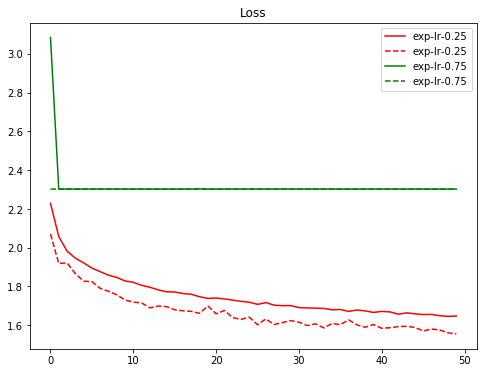

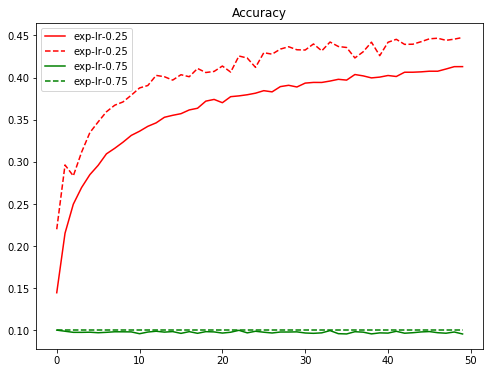

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Plot results
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# 3層隱藏層 Dropout = 0.25 或 0.75

In [19]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):

    
    
    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
## 超參數設定

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.25,0.75]

In [21]:
results = {}



for drp in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp)
    model.summary()
    optimizer = keras.optimizers.adam(lr=LEARNING_RATE,  beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0,amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(drp)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_27 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
__________

50000/50000 [==============================] - 17s 345us/step - loss: 1.4736 - acc: 0.4700 - val_loss: 1.4320 - val_acc: 0.4903
Epoch 50/50
50000/50000 [==============================] - 17s 345us/step - loss: 1.4685 - acc: 0.4738 - val_loss: 1.4519 - val_acc: 0.4883
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_30 (Dropout)         (None, 256)               0         
______

50000/50000 [==============================] - 17s 346us/step - loss: 2.3027 - acc: 0.0972 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 17s 345us/step - loss: 2.3027 - acc: 0.0990 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 17s 348us/step - loss: 2.3027 - acc: 0.0964 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 17s 346us/step - loss: 2.3027 - acc: 0.0959 - val_loss: 2.3026 - val_acc: 0.1000


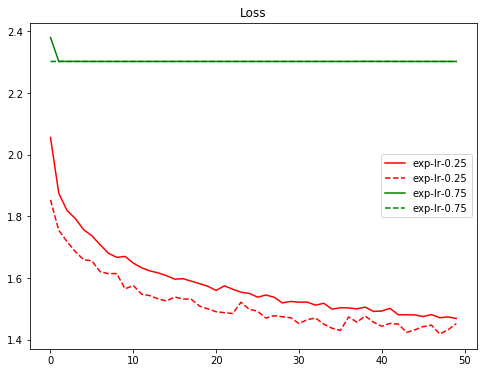

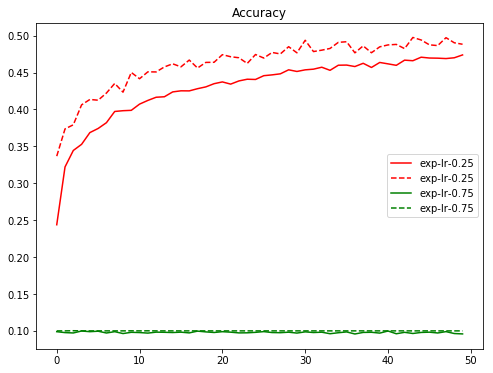

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])


plt.legend()
plt.title("Loss")
plt.show()


plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()

# 比起訓練的層數，dropout的值似乎影響準確率比較多